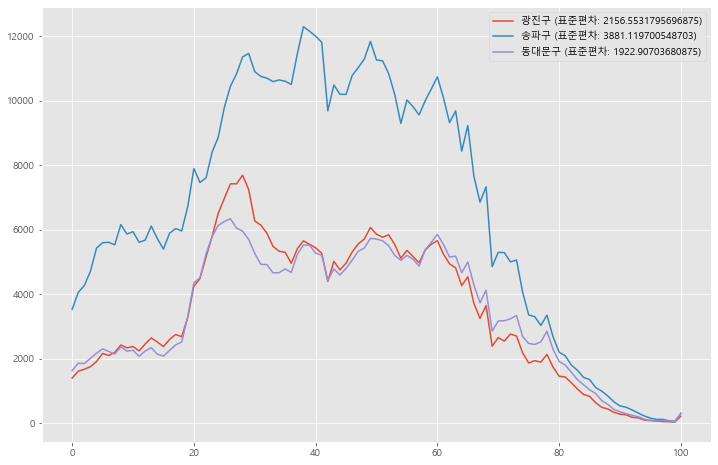

In [3]:
#week14 광진구와 비슷한인구구조/가장 다른인구구조 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm, rc

df = pd.read_csv('seoulPopulation.csv', encoding='cp949')
dataAll = np.array(df)
dataOnly = dataAll[1:, 3:].copy() # only 숫자
for row in range(dataOnly.shape[0]):
    for col in range(dataOnly.shape[1]):
        dataOnly[row][col] = int(dataOnly[row][col].replace(',',''))
data = np.insert(dataOnly, 0, dataAll[1:, 0], axis=1) # 행정구역 추가 (25, 102)


maxTotal = 0
minTotal = 999999999999999999
for i in range(data.shape[0]): #0~24
    if i == 4: # 광진구 제외
        continue
    total = 0
    for j in range(1, data.shape[1]): #1~101
        total = total + (data[i][j] - data[4][j]) ** 2
    if total > maxTotal:
        maxTotal = total
        maxIndex = i
    if total < minTotal:
        minTotal = total
        minIndex = i

plt.figure(figsize=(12, 8))
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=font_name)
plt.style.use('ggplot')
plt.plot(data[4][1:], label="{0} (표준편차: {1})".format(data[4][0].split()[1], np.std(data[4][1:])))
plt.plot(data[maxIndex][1:], label="{0} (표준편차: {1})".format(data[maxIndex][0].split()[1], np.std(data[maxIndex][1:])))
plt.plot(data[minIndex][1:], label="{0} (표준편차: {1})".format(data[minIndex][0].split()[1], np.std(data[minIndex][1:])))

plt.legend()
plt.show()